In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
os.chdir("/Users/yj.noh/Documents/GitHub")
print(os.getcwd())
plt.rcParams['font.family'] = 'AppleGothic'

/Users/yj.noh/Documents/GitHub


In [3]:
df = pd.read_csv("/Users/yj.noh/Desktop/risk_ratio.csv", encoding = "utf-8")
print(df.isna().sum())

brms_rider_id    0
cluster          0
is_churn         0
risk_ratio       0
dtype: int64


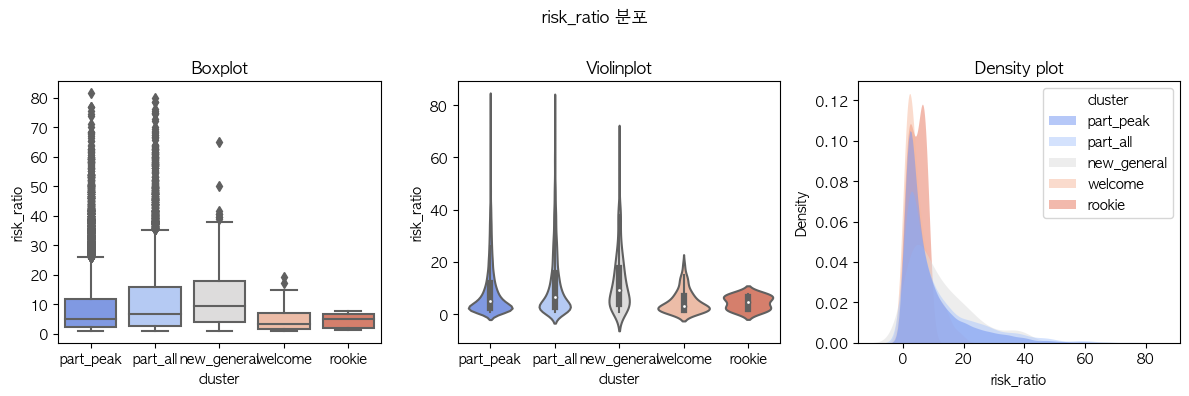

In [5]:
# palette = plasma, coolwarm, magma, BuGn, Dark2 
def plot_numeric (data, num_var, outcome):
  
    palette = 'coolwarm'
    
    mapping = {0 : '미이탈', 1 : '이탈'}
    data[outcome] = data[outcome].replace(mapping)

    fig, axs = plt.subplots(1,3, figsize=(12,4))
    fig.suptitle(f'{num_var} 분포', fontsize = 12)

    # Boxplot
    sns.boxplot(ax=axs[0], x= outcome, y=num_var, data= data, palette = palette)
    axs[0].set_title('Boxplot')

    # Violinplot
    sns.violinplot(ax=axs[1], x = outcome, y = num_var, data = data, palette = palette)
    axs[1].set_title('Violinplot')
    
    # KDE plot
    sns.kdeplot(ax=axs[2], data = data, x = num_var, hue = outcome, fill = True, common_norm = False, palette = palette, alpha=.5, linewidth=0)
    axs[2].set_title('Density plot')
    
    plt.tight_layout()
    fig.subplots_adjust(top=0.8) # title 공간 확보
    
    #fig.savefig(f'graphs_all/{num_var}_distributions.png')
    plt.show()
    plt.close(fig)

plot_numeric (df, 'risk_ratio', 'cluster')